# Candlestick Matching Low

https://www.investopedia.com/terms/m/matching-low.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'ETSY'
start = '2021-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,179.520004,181.600006,168.251999,172.080002,172.080002,3262000
2021-01-05,170.190002,175.770004,169.061996,174.979996,174.979996,2168200
2021-01-06,172.110001,173.160004,166.330002,167.570007,167.570007,2966000
2021-01-07,170.300003,173.500000,167.250000,170.789993,170.789993,2785200
2021-01-08,172.910004,179.729996,171.759995,175.649994,175.649994,2470400


## Candlestick with Matching Low

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737794.0,179.520004,181.600006,168.251999,172.080002,172.080002,3262000,False
1,737795.0,170.190002,175.770004,169.061996,174.979996,174.979996,2168200,True
2,737796.0,172.110001,173.160004,166.330002,167.570007,167.570007,2966000,False
3,737797.0,170.300003,173.500000,167.250000,170.789993,170.789993,2785200,True
4,737798.0,172.910004,179.729996,171.759995,175.649994,175.649994,2470400,True


Text(0, 0.5, 'Price')

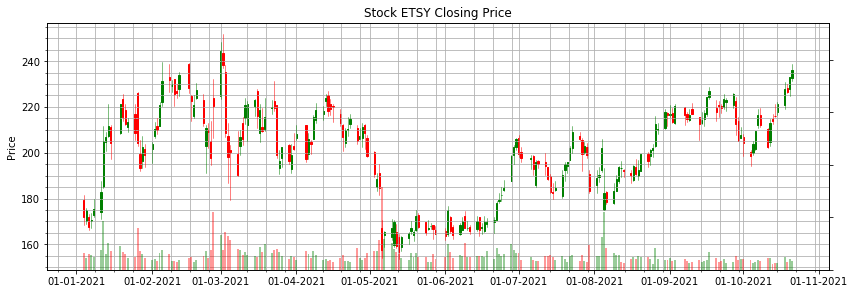

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
matching_low = talib.CDLMATCHINGLOW(df['Open'], df['High'], df['Low'], df['Close'])

matching_low = matching_low[matching_low != 0]

In [6]:
df['matching_low'] = talib.CDLMATCHINGLOW(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['matching_low'] !=0]

,Open,High,Low,Close,Adj Close,Volume,matching_low
Date,,,,,,,
2021-02-11,227.102005,230.039993,223.729996,226.050003,226.050003,1521400,100


In [8]:
df['Adj Close'].loc[df['matching_low'] !=0]

Date
2021-02-11    226.050003
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['matching_low'] !=0].values

array([226.05000305])

In [10]:
df['Adj Close'].loc[df['matching_low'] !=0].index

DatetimeIndex(['2021-02-11'], dtype='datetime64[ns]', name='Date', freq=None)

In [11]:
matching_low

Date
2021-02-11    100
dtype: int32

In [12]:
matching_low.index

DatetimeIndex(['2021-02-11'], dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,matching_low
Date,,,,,,,
2021-01-04,179.520004,181.600006,168.251999,172.080002,172.080002,3262000,0
2021-01-05,170.190002,175.770004,169.061996,174.979996,174.979996,2168200,0
2021-01-06,172.110001,173.160004,166.330002,167.570007,167.570007,2966000,0
2021-01-07,170.300003,173.500000,167.250000,170.789993,170.789993,2785200,0
2021-01-08,172.910004,179.729996,171.759995,175.649994,175.649994,2470400,0
...,...,...,...,...,...,...,...
2021-10-15,218.000000,222.080002,216.625000,221.089996,221.089996,1387800,0
2021-10-18,220.940002,230.843002,219.289993,228.000000,228.000000,2519300,0
2021-10-19,228.289993,230.149994,226.184998,226.410004,226.410004,1432400,0


Text(0, 0.5, 'Price')

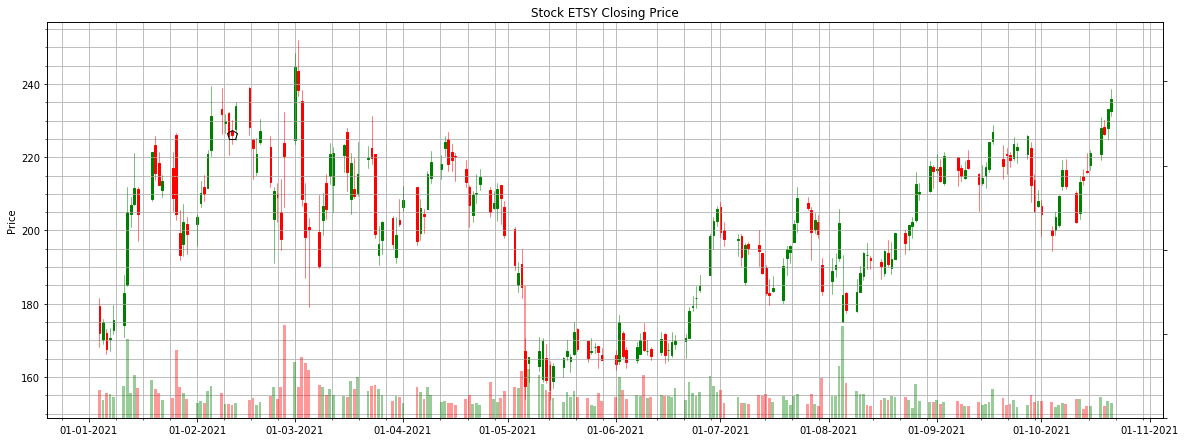

In [14]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['matching_low'] !=0].index, df['Adj Close'].loc[df['matching_low'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [15]:
df = df['2021-02-01':'2021-03-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,matching_low,VolumePositive
0,737822.0,201.679993,204.615005,195.679993,203.770004,203.770004,1800700,0,True
1,737823.0,207.399994,213.423996,206.347000,210.289993,210.289993,1976300,0,True
2,737824.0,211.759995,215.160004,208.018997,210.070007,210.070007,1727000,0,False
3,737825.0,211.699997,221.957993,211.699997,220.839996,220.839996,3185600,0,True
4,737826.0,222.000000,239.470001,220.320007,231.119995,231.119995,3817600,0,True


Text(0, 0.5, 'Price')

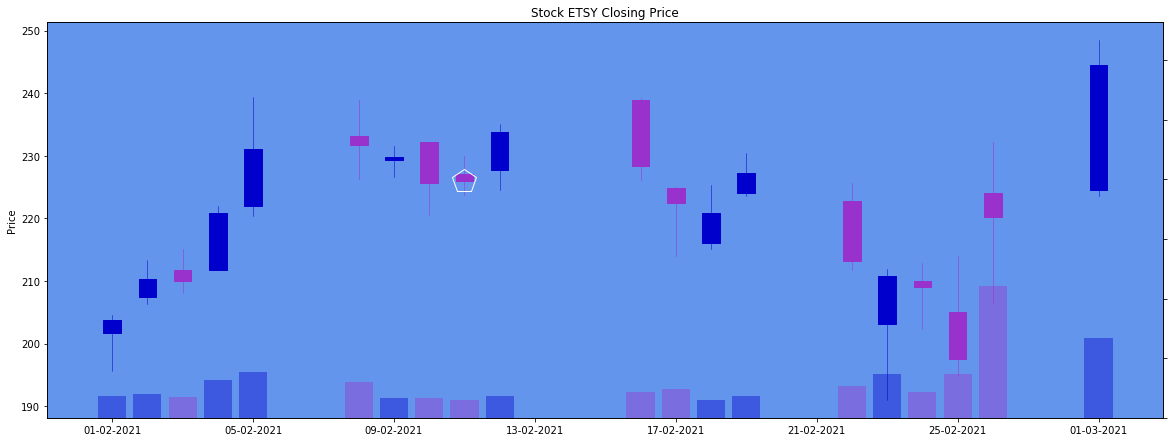

In [16]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('cornflowerblue')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='mediumblue', colordown='darkorchid', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['matching_low'] !=0].index, df['Adj Close'].loc[df['matching_low'] !=0],
                'pw', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'mediumblue', False: 'darkorchid'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

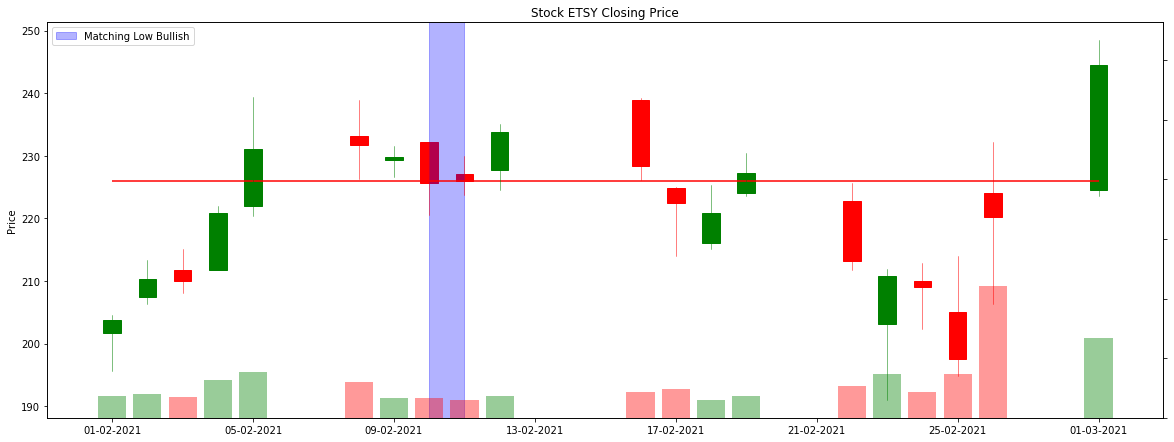

In [17]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,2,10)), date2num(datetime(2021,2,11)), 
           label="Matching Low Bullish",color="blue", alpha=0.3)
ax.hlines(y=df['Adj Close'].loc[df['matching_low'] !=0].values, color='r', linestyle='-', xmin=pd.to_datetime('2021-02-01'), xmax=pd.to_datetime('2021-03-01'))
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')